<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Run-ME-FO,-ME-SO-and-ME-FOSC" data-toc-modified-id="Run-ME-FO,-ME-SO-and-ME-FOSC-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Run ME-FO, ME-SO and ME-FOSC</a></span></li><li><span><a href="#Plot-total-travel-time" data-toc-modified-id="Plot-total-travel-time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot total travel time</a></span></li><li><span><a href="#Run-ORHP" data-toc-modified-id="Run-ORHP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Run ORHP</a></span></li></ul></div>

# ME-FO, ME-SO and ME-FOSC

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Pittsburgh network
directory = "Data/Networks/Pittsburgh/"
net_file = '{}pitts_net_new_0716.tntp.txt'.format(directory)
trip_file = '{}pitts_trips_new_0716.tntp.txt'.format(directory)
node_file = None
net_name = 'PGH'

file_ME_TTT = directory + "output/{}/mu_t_1.5_mu_p_2.0_downtown_{}/record of TTT_FTT_FC.pickle"

## Plot total travel time

TTT of ME is plotted and saved as Data/Networks/Pittsburgh/output/TTT of ME of PGH_downtown_1.png
TTT of ME is plotted and saved as Data/Networks/Pittsburgh/output/TTT of ME of PGH_downtown_2.png


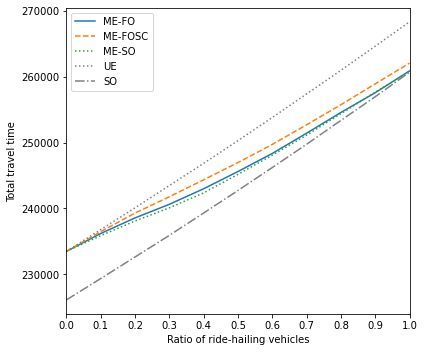

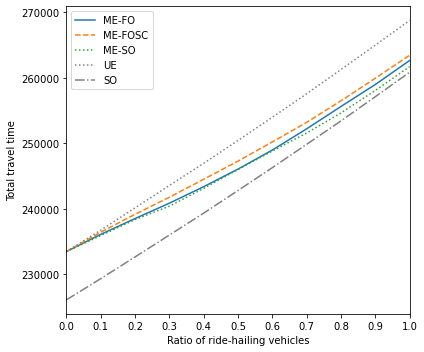

In [10]:
def plot_ME_TTT(file_ME_TTT, downtown_factor, directory):
    with open(file_ME_TTT.format("ME-FO", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_FO = record['TTT_list'] 

    # file = path.format("ME-FOSC")
    with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_FOSC = record['TTT_list'] 

    # file = path.format("ME-SO")
    with open(file_ME_TTT.format("ME-SO", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_SO = record['TTT_list'] 

# 'Baseline-SO', 'Baseline-UE'

    with open(file_ME_TTT.format('Baseline-UE', downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_Bs_UE = record['TTT_list'] 
    
    with open(file_ME_TTT.format('Baseline-SO', downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_Bs_SO = record['TTT_list'] 
    

    x=np.arange(0, 1.1, 0.1)
    plt.figure(figsize=(6, 5))
    plt.plot(x, TTT_FO, label = "ME-FO")
    plt.plot(x, TTT_FOSC, linestyle='dashed', label = "ME-FOSC")
    plt.plot(x, TTT_SO, linestyle='dotted', label = "ME-SO")
    plt.plot(x, TTT_Bs_UE, linestyle='dotted', color= '0.5', label = "UE")
    plt.plot(x, TTT_Bs_SO, linestyle='dashdot', color= '0.5', label = "SO")
    # plt.axhline(y=TTT_SO[0], linestyle='dotted', color= '0.5', label = "UE")
    # plt.axhline(y=TTT_SO[-1], linestyle='dashdot', color= '0.5', label = "SO")
    plt.legend()
    plt.ylabel("Total travel time")
    plt.xlabel("Ratio of ride-hailing vehicles")
    plt.xlim(0, 1)
    plt.tight_layout()
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    fig_name = directory + "output/TTT of ME of PGH_downtown_{}.png".format(downtown_factor)
    plt.savefig(fig_name, dpi=800)
    print('TTT of ME is plotted and saved as {}'.format(fig_name))


for downtown_factor in [1 ,2]:
# for downtown_factor in [1]:
    plot_ME_TTT(file_ME_TTT, downtown_factor, directory)


In [ ]:
# def plot_ME_TTT(file_ME_TTT, downtown_factor, directory):
#     with open(file_ME_TTT.format("ME-FO", downtown_factor), 'rb') as f:
#         record = pickle.load(f)
#         TTT_FO = np.array(record['TTT_list'])


#     # file = path.format("ME-FOSC")
#     with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
#         record = pickle.load(f)
#         TTT_FOSC = np.array(record['TTT_list'])

#     # file = path.format("ME-SO")
#     with open(file_ME_TTT.format("ME-SO", downtown_factor), 'rb') as f:
#         record = pickle.load(f)
#         TTT_SO = np.array(record['TTT_list'])

# # 'Baseline-SO', 'Baseline-UE'

#     with open(file_ME_TTT.format('Baseline-UE', downtown_factor), 'rb') as f:
#         record = pickle.load(f)
#         TTT_Bs_UE = np.array(record['TTT_list'])
    
#     with open(file_ME_TTT.format('Baseline-SO', downtown_factor), 'rb') as f:
#         record = pickle.load(f)
#         TTT_Bs_SO = np.array(record['TTT_list'])
    

#     x=np.arange(0, 1.1, 0.1)
#     plt.figure(figsize=(6, 5))
#     plt.plot(x, TTT_Bs_UE - TTT_FO, label = "ME-FO")
#     plt.plot(x, TTT_Bs_UE - TTT_FOSC, linestyle='dashed', label = "ME-FOSC")
#     plt.plot(x, TTT_Bs_UE - TTT_SO, linestyle='dotted', label = "ME-SO")
#     plt.plot(x, TTT_Bs_UE - TTT_Bs_UE, linestyle='dotted', color= '0.5', label = "UE")
#     plt.plot(x, TTT_Bs_UE - TTT_Bs_SO, linestyle='dashdot', color= '0.5', label = "SO")
#     # plt.axhline(y=TTT_SO[0], linestyle='dotted', color= '0.5', label = "UE")
#     # plt.axhline(y=TTT_SO[-1], linestyle='dashdot', color= '0.5', label = "SO")
#     plt.legend()
#     plt.ylabel("Total travel time reduction from UE")
#     plt.xlabel("Ratio of ride-hailing vehicles")
#     plt.xlim(0, 1)
#     plt.tight_layout()
#     ax = plt.gca()
#     ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
#     fig_name = directory + "output/TTT of ME of PGH_downtown_{}.png".format(downtown_factor)
#     plt.savefig(fig_name, dpi=800)
#     print('TTT of ME is plotted and saved as {}'.format(fig_name))


# for downtown_factor in [1 ,2]:
# # for downtown_factor in [1]:
#     plot_ME_TTT(file_ME_TTT, downtown_factor, directory)


Plot fleet travel time reduction from UE

FTT reduction of ME from UE is plotted and saved as Data/Networks/Pittsburgh/output/FTT reduction of ME from UE of PGH downtown_1.png
FTT reduction of ME from UE is plotted and saved as Data/Networks/Pittsburgh/output/FTT reduction of ME from UE of PGH downtown_2.png


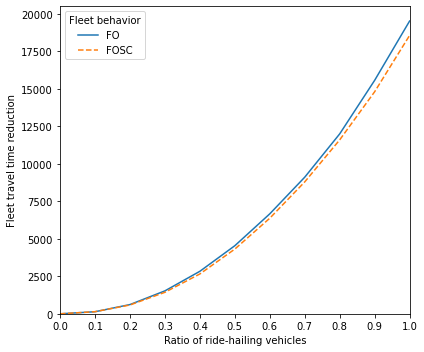

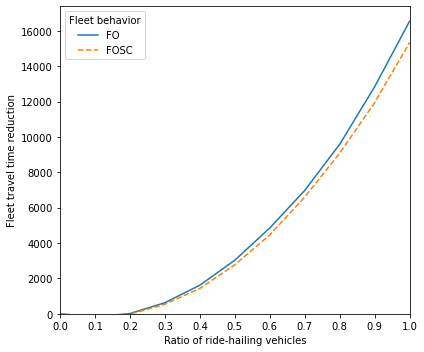

In [3]:
# TTT_UE = TTT_Bs_UE  # run former code cell at first 
# FTT_UE = x * TTT_UE
def plot_FTT_reduction(file_ME_TTT, downtown_factor, directory):

    with open(file_ME_TTT.format("ME-FO", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        FTT_FO = record['FTT_list']

    with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        FTT_FOSC = record['FTT_list']

    with open(file_ME_TTT.format('Baseline-UE', downtown_factor), 'rb') as f:
        record = pickle.load(f)
        TTT_Bs_UE = np.array(record['TTT_list'])
    
            
    x=np.arange(0, 1.1, 0.1)
    FTT_UE = TTT_Bs_UE * x
    plt.figure(figsize=(6, 5))
    FTT_red_FO = FTT_UE - FTT_FO
    FTT_red_FOSC = FTT_UE - FTT_FOSC
    plt.plot(x, FTT_red_FO, label = "FO")
    plt.plot(x, FTT_red_FOSC, linestyle='dashed', label = "FOSC")
    plt.legend(title="Fleet behavior")
    plt.ylabel("Fleet travel time reduction")
    plt.xlabel("Ratio of ride-hailing vehicles")
    plt.ylim(0)
    plt.xlim(0, 1)
    plt.tight_layout()
    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MultipleLocator(0.1))
    fig_name = directory + "output/FTT reduction of ME from UE of PGH downtown_{}.png".format(downtown_factor)
    plt.savefig(fig_name, dpi=800)
    print('FTT reduction of ME from UE is plotted and saved as {}'.format(fig_name))

for downtown_factor in [1 ,2]:
# for downtown_factor in [1]:
    plot_FTT_reduction(file_ME_TTT, downtown_factor, directory)


Plot loaded unfairness

<ipython-input-3-ba6546bc2192>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LU_FO_mat = np.array(LU_FO_list).tolist()
<ipython-input-3-ba6546bc2192>:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LU_FOSC_mat = np.array(LU_FOSC_list).tolist()
<ipython-input-3-ba6546bc2192>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _TT

Loaded unfairness is plotted and saved as Data/Networks/Pittsburgh/output/Loaded unfairness of PGH_downtown_1.png


<ipython-input-3-ba6546bc2192>:53: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LU_FO_mat = np.array(LU_FO_list).tolist()
<ipython-input-3-ba6546bc2192>:54: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  LU_FOSC_mat = np.array(LU_FOSC_list).tolist()
<ipython-input-3-ba6546bc2192>:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _TT

Loaded unfairness is plotted and saved as Data/Networks/Pittsburgh/output/Loaded unfairness of PGH_downtown_2.png


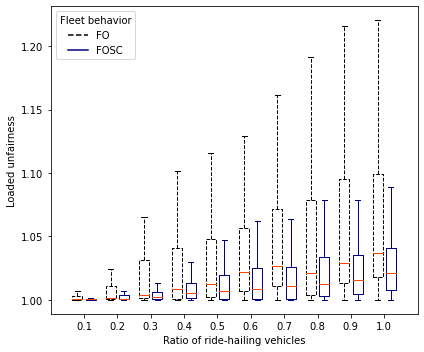

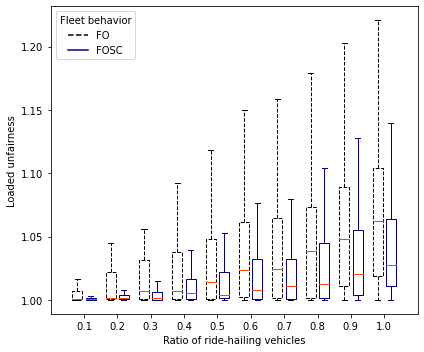

In [3]:
def plot_loaded_unfairness(file_ME_TTT, downtown_factor, directory):

    with open(file_ME_TTT.format("ME-FO", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        flows_FO_list = record['RH_path_flows_list']
        TT_FO_list = record['Path_TT_list']
        
    with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
        record = pickle.load(f)
        flows_FOSC_list = record['RH_path_flows_list']
        TT_FOSC_list = record['Path_TT_list']
        
    def cal_weighted_LU(path_flows_RH, path_TT):
        LU_list = []
        # sum_LU = 0
        # sum_flow = 0
        for key in path_flows_RH.keys():
            flows = path_flows_RH[key]
            TT = path_TT[key]
            TT_min = min(TT)
            for i in range(len(flows)):
                weight = round(flows[i], 0)
    #             weight = round(flows[i] * 10, 0)
                LU = TT[i] / TT_min
                if weight > 0 and LU > 1:
                    LU_list.append((weight, LU, TT[i]))
        LU_list = np.array(LU_list, dtype=[('weight', int), ('LU', float), ('TT', float)])

        return LU_list


    LU_FO_list = []
    LU_FOSC_list = []
    _TT_FO_list = []
    _TT_FOSC_list =[]
    for i in range(1, 11):
        flows_FO = flows_FO_list[i]
        TT_FO = TT_FO_list[i]
        flows_FOSC = flows_FOSC_list[i]
        TT_FOSC = TT_FOSC_list[i]
        weighted_LU_FO = cal_weighted_LU(path_flows_RH=flows_FO, path_TT=TT_FO)
        weighted_LU_FOSC = cal_weighted_LU(path_flows_RH=flows_FOSC, path_TT=TT_FOSC)
        LU_FO = np.concatenate([np.repeat(d[1], d[0]) for d in weighted_LU_FO]).ravel()
        LU_FOSC = np.concatenate([np.repeat(d[1], d[0]) for d in weighted_LU_FOSC]).ravel()
        LU_FO_list.append(LU_FO.tolist())
        LU_FOSC_list.append(LU_FOSC.tolist())
                            
        _TT_FO = np.concatenate([np.repeat(d[2], d[0]) for d in weighted_LU_FO]).ravel()
        _TT_FOSC = np.concatenate([np.repeat(d[2], d[0]) for d in weighted_LU_FOSC]).ravel()
        _TT_FO_list.append(_TT_FO.tolist())
        _TT_FOSC_list.append(_TT_FOSC.tolist())

    LU_FO_mat = np.array(LU_FO_list).tolist()
    LU_FOSC_mat = np.array(LU_FOSC_list).tolist()

    _TT_FO_mat = np.array(_TT_FO_list)
    _TT_FOSC_mat = np.array(_TT_FOSC_list)

    def set_box_color(bp, linestyle, color):
        plt.setp(bp['boxes'], linestyle=linestyle, color=color)
        plt.setp(bp['whiskers'], linestyle=linestyle, color=color)
        plt.setp(bp['caps'], color=color)
        plt.setp(bp['medians'], color='orangered')

    x=np.round(np.arange(0.1, 1.1, 0.1), 1)

    plt.figure(figsize=(6, 5))
    bp_FO = plt.boxplot(LU_FO_mat, positions=np.array(range(x.shape[0]))*2.0-0.4, sym='', widths=0.6)
    bp_FOSC = plt.boxplot(LU_FOSC_mat, positions=np.array(range(x.shape[0]))*2.0+0.4, sym='', widths=0.6)
    set_box_color(bp_FO, '--', 'black')
    set_box_color(bp_FOSC, '-', 'navy')
    plt.plot([], c='black', linestyle='--', label='FO')
    plt.plot([], c='navy', label='FOSC')
    plt.legend(title="Fleet behavior")

    plt.ylabel("Loaded unfairness")
    plt.xlabel("Ratio of ride-hailing vehicles")
    plt.xticks(range(0, len(x) * 2, 2), x)
    plt.xlim(-2, len(x)*2)
    plt.tight_layout()
    fig_name = directory + "output/Loaded unfairness of PGH_downtown_{}.png".format(downtown_factor)
    plt.savefig(fig_name, dpi=800)
    print('Loaded unfairness is plotted and saved as {}'.format(fig_name))

for downtown_factor in [1 ,2]:
# for downtown_factor in [1]:
    plot_loaded_unfairness(file_ME_TTT, downtown_factor, directory)


# Run ORHP

In [2]:
file_ME_VC = directory + "output/{}/mu_t_1.5_mu_p_2.0_downtown_1/VC ratios with demand ratio of 0.5.pickle"
path_ORHP = "Data/Networks/Pittsburgh/output/ORHP/mu_t_1.5_mu_p_2.0_downtown_1/"
file_ORHP_gamma_0 = path_ORHP + "gamma=0.0 lr=0.01 scheme=discriminatory subsidies.pickle"
file_ORHP_gamma_x = path_ORHP + "gamma={} lr=0.01 scheme=discriminatory subsidies.pickle"
shp_file = 'Data/Networks/Pittsburgh/shpfiles/dtpitts.shp'
downtown_factor = 1


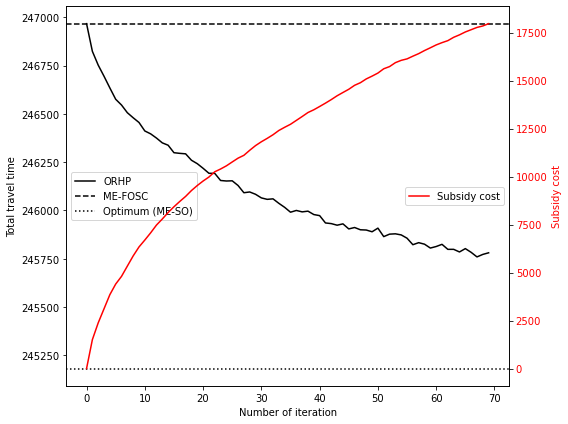

In [6]:
# output_path = "/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/output/ORHP/"
# file = output_path + "gamma=0.0 lr=0.01 scheme=discriminatory subsidies.pickle"


with open(file_ORHP_gamma_x.format(0.0), 'rb') as f:
    record_dict = pickle.load(f)
    TTT_list = record_dict['TTT_VS_iter']
    cost_omega_list = record_dict['subsidy_cost_VS_iter']
    obj_list = record_dict[ 'generalized_cost_VS_iter']
    vc_list = record_dict['link VC ratios']
    toll_list = record_dict['link subsidies (tolls)']

with open(file_ME_TTT.format("ME-SO", downtown_factor), 'rb') as f:
    record = pickle.load(f)
    TTT_SO = record['TTT_list'] 
    
with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
    record = pickle.load(f)
    TTT_FOSC = record['TTT_list'] 
    

fig, ax1 = plt.subplots(figsize=(8,6))

color = '0'
ax1.set_xlabel("Number of iteration")
ax1.set_ylabel('Total travel time', color=color)
ax1.plot(TTT_list, color=color, label='ORHP')
plt.axhline(y=TTT_FOSC[5], color='black', linestyle='dashed', label = "ME-FOSC")
plt.axhline(y=TTT_SO[5], color='black', linestyle='dotted', label = "Optimum (ME-SO)")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'red'
ax2.set_ylabel('Subsidy cost', color=color)  # we already handled the x-label with ax1
ax2.plot(cost_omega_list, color=color, label='Subsidy cost')
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='center left')
ax2.legend(loc='center right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name = directory + "output/ORHP (gamma=0) of PGH.png"
plt.savefig(fig_name, dpi=800)

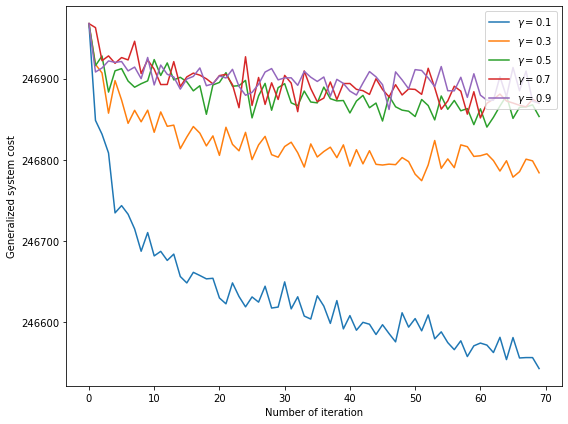

In [4]:
fig, ax1 = plt.subplots(figsize=(8,6))
# ax2 = ax1.twinx()
for i in np.round(np.arange(0.1, 1.1, 0.2), 1):
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']
#     if i == 0.0:
#         obj_list = TTT_list
    ax1.plot(obj_list, label=r'$\gamma={}$'.format(i))
#     ax2.plot(cost_omega_list, color=color, label='Subsidy cost (gamma=)'.format(i))

ax1.set_xlabel("Number of iteration")
ax1.set_ylabel('Generalized system cost')
ax1.tick_params(axis='y')
ax1.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name = directory + "output/ORHP generalized cost of PGH.png"
plt.tight_layout()
plt.savefig(fig_name, dpi=800)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


[-17754.983214951393, -4336.1124057709885, -1120.4186312688962, -321.00634379391335, -124.080543090016, -74.06721780447914] 
 [1513.330027202348, 1168.3277968759357, 839.7871544677473, 593.2417374871147, 510.69222249960876, 469.7473517228209]


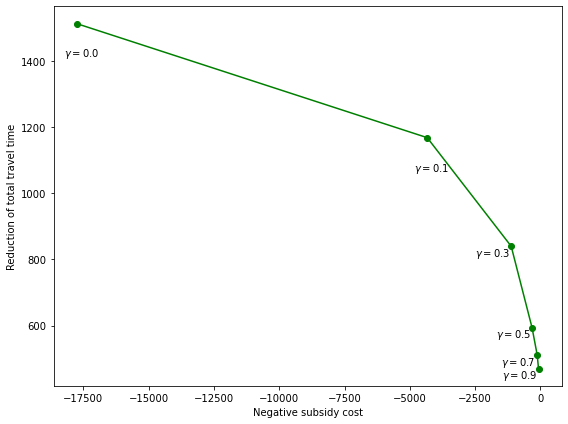

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import interpolate


with open(file_ME_TTT.format("ME-FOSC", downtown_factor), 'rb') as f:
    record = pickle.load(f)
    TTT_FOSC = record['TTT_list'] 

TTT_red = []
subsidy_cost = []

plt.figure(figsize=(8, 6))

for i in np.insert(np.arange(0.1, 1.1, 0.2), 0, 0.0):
    i = np.round(i, 1)
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']

    red =TTT_FOSC[5] - sum(TTT_list[-5:])/5


    ave_subsidy_cost = -sum(cost_omega_list[-5:])/5
    TTT_red.append(red)
    subsidy_cost.append(ave_subsidy_cost)
    if i<=0.1:
        plt.annotate(r'$\gamma={}$'.format(i), xy=(ave_subsidy_cost-500, red-100))
    else:
        plt.annotate(r'$\gamma={}$'.format(i), xy=(ave_subsidy_cost-1400, red-30))
f = interpolate.interp1d(subsidy_cost, TTT_red)
x = np.arange(min(subsidy_cost), max(subsidy_cost), 100)
y = f(x)  

plt.plot(subsidy_cost, TTT_red, '-o', color='g')
plt.xlabel("Negative subsidy cost")
plt.ylabel("Reduction of total travel time")
plt.tight_layout()
fig_name = directory + "output/Pareto frontier of PGH.png"
plt.savefig(fig_name, dpi=800)
print(subsidy_cost, '\n' ,TTT_red)
plt.show()

In [9]:
# # ----plot vc distribution of FOSC

# shp_file = '/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/shpfiles/dtpitts.shp'
# shp = gpd.read_file(shp_file)

# file = "/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/output/ME-FOSC/VC ratios with demand ratio of 0.5.pickle"
# with open(file, 'rb') as f:
#     edge_vc_dict_FOSC = pickle.load(f)
    
# shp["link"] = shp[["N1","N2"]].apply(tuple, axis=1)
# shp['value'] = shp["link"].map(edge_vc_dict_FOSC)


# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# shp_ax = shp.plot(column='value', cmap='Reds', ax=ax, cax=cax, legend=True, vmin=0.5)
# shp_ax.xaxis.set_visible(False)
# shp_ax.yaxis.set_visible(False)
# fig_name = directory + "output/VC ratios of ME-FOSC of PGH.png"
# plt.tight_layout()
# plt.savefig(fig_name, dpi=800)
# plt.show()

# # ----plot vc change from FOSC to SO
# shp_file = '/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/shpfiles/dtpitts.shp'
# shp = gpd.read_file(shp_file)

# file = "/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/output/ME-FOSC/VC ratios with demand ratio of 0.5.pickle"
# with open(file, 'rb') as f:
#     edge_vc_dict_FOSC = pickle.load(f)

# file = "/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/output/ME-SO/VC ratios with demand ratio of 0.5.pickle"
# with open(file, 'rb') as f:
#     edge_vc_dict_SO = pickle.load(f)
    
# value_dict = {}
# for key in edge_vc_dict_FOSC.keys():
#     value_dict[key] = edge_vc_dict_SO[key] - edge_vc_dict_FOSC[key]

# shp["link"] = shp[["N1","N2"]].apply(tuple, axis=1)
# shp['value'] = shp["link"].map(value_dict)


# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# shp_ax = shp.plot(column='value', cmap='RdYlGn_r', ax=ax, legend=True, cax=cax, vmin=-0.3, vmax=0.3)
# shp_ax.xaxis.set_visible(False)
# shp_ax.yaxis.set_visible(False)
# plt.tight_layout()
# fig_name = directory + "output/VC change from FOSC to SO of PGH.png"
# plt.savefig(fig_name, dpi=800)
# plt.show()

# # ----plot vc change from FOSC to ORHP
# shp_file = '/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/shpfiles/dtpitts.shp'
# shp = gpd.read_file(shp_file)

# file = "/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/output/ME-FOSC/VC ratios with demand ratio of 0.5.pickle"
# with open(file, 'rb') as f:
#     edge_vc_dict_FOSC = pickle.load(f)

# file="/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/output/ORHP/gamma=0.0 lr=0.01 scheme=discriminatory subsidies.pickle"
# with open(file, 'rb') as f:
#     [TTT_list, cost_omega_list, obj_list, _, _, vc_list, toll_list] = pickle.load(f)

# value_dict = {}
# for key in edge_vc_dict_FOSC.keys():
#     value_dict[key] = vc_list[key] - edge_vc_dict_FOSC[key]

# shp["link"] = shp[["N1","N2"]].apply(tuple, axis=1)
# shp['value'] = shp["link"].map(value_dict)


# fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
# shp_ax = shp.plot(column='value', cmap='RdYlGn_r', ax=ax, legend=True, cax=cax, vmin=-0.3, vmax=0.3)
# shp_ax.xaxis.set_visible(False)
# shp_ax.yaxis.set_visible(False)
# plt.tight_layout()
# fig_name = directory + "output/VC change from FOSC to ORHP of PGH.png"
# plt.savefig(fig_name, dpi=800)
# plt.show()

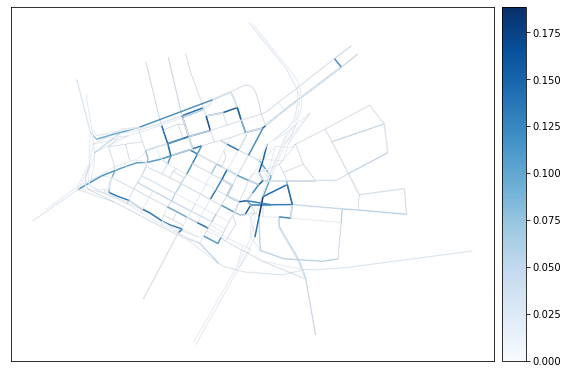

In [8]:
# ----plot subsidy distribution

shp = gpd.read_file(shp_file)

with open(file_ORHP_gamma_0, 'rb') as f:
    record_dict = pickle.load(f)
    TTT_list = record_dict['TTT_VS_iter']
    cost_omega_list = record_dict['subsidy_cost_VS_iter']
    obj_list = record_dict[ 'generalized_cost_VS_iter']
    vc_list = record_dict['link VC ratios']
    toll_list = record_dict['link subsidies (tolls)']

value_dict = toll_list

shp["link"] = shp[["N1","N2"]].apply(tuple, axis=1)
shp['value'] = shp["link"].map(value_dict)

fig, ax = plt.subplots(1, 1,  figsize=(8, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
shp_ax = shp.plot(column='value', cmap='Blues', ax=ax, legend=True, cax=cax)
shp.plot(alpha=0.5, edgecolor='grey', ax=ax, linewidth=0.2)
shp_ax.xaxis.set_visible(False)
shp_ax.yaxis.set_visible(False)
fig_name = directory + "output/subsidy distribution of PGH.jpg"
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
plt.show()
        

Data/Networks/Pittsburgh/output/VC ratios of ME-FOSC of PGH.png


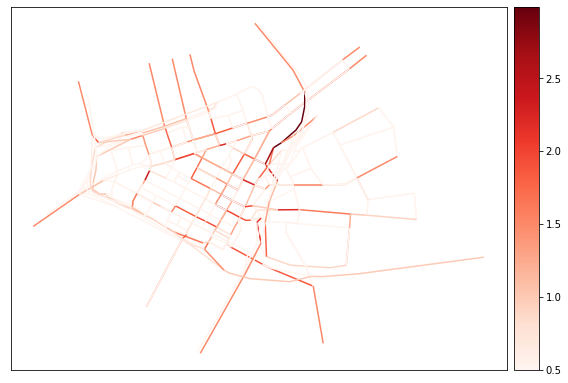

Data/Networks/Pittsburgh/output/VC change from FOSC to SO of PGH.png


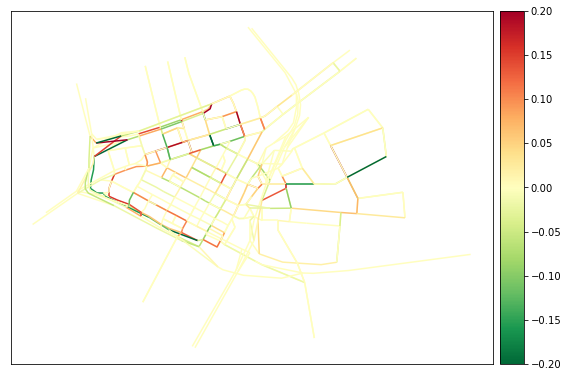

Data/Networks/Pittsburgh/output/VC change from FOSC to ORHP of PGH.png


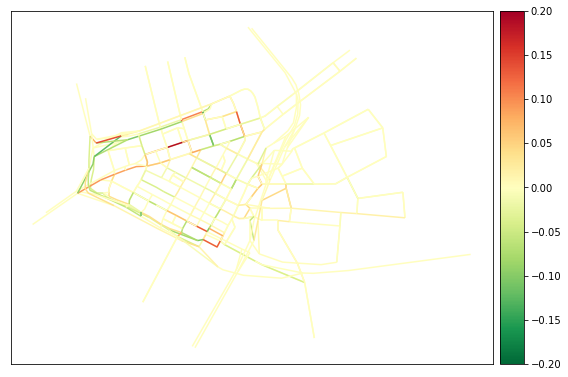

In [9]:
# ----plot vc distribution of FOSC
shp = gpd.read_file(shp_file)

with open(file_ME_VC.format("ME-FOSC", downtown_factor), 'rb') as f:
    edge_vc_dict_FOSC = pickle.load(f)
    
shp["link"] = shp[["N1","N2"]].apply(tuple, axis=1)
shp['value'] = shp["link"].map(edge_vc_dict_FOSC)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
shp_ax = shp.plot(column='value', cmap='Reds', ax=ax, cax=cax, legend=True, vmin=0.5)
shp_ax.xaxis.set_visible(False)
shp_ax.yaxis.set_visible(False)
fig_name = directory + "output/VC ratios of ME-FOSC of PGH.png"
plt.tight_layout()
plt.savefig(fig_name, dpi=800)
print(fig_name)
plt.show()

# ----plot vc change from FOSC to SO

with open(file_ME_VC.format("ME-SO", downtown_factor), 'rb') as f:
    edge_vc_dict_SO = pickle.load(f)
    
value_dict = {}
for key in edge_vc_dict_FOSC.keys():
    value_dict[key] = edge_vc_dict_SO[key] - edge_vc_dict_FOSC[key]

shp["link"] = shp[["N1","N2"]].apply(tuple, axis=1)
shp['value'] = shp["link"].map(value_dict)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
shp_ax = shp.plot(column='value', cmap='RdYlGn_r', ax=ax, legend=True, cax=cax, vmin=-0.2, vmax=0.2)
shp_ax.xaxis.set_visible(False)
shp_ax.yaxis.set_visible(False)
plt.tight_layout()
fig_name = directory + "output/VC change from FOSC to SO of PGH.png"
plt.savefig(fig_name, dpi=800)
print(fig_name)
plt.show()

# ----plot vc change from FOSC to ORHP
# file="/home/zemian/Projects/ORHP/Data/Networks/Pittsburgh/output/ORHP/gamma=0.0 lr=0.01 scheme=discriminatory subsidies.pickle"
with open(file_ORHP_gamma_0, 'rb') as f:
    record_dict = pickle.load(f)
    TTT_list = record_dict['TTT_VS_iter']
    cost_omega_list = record_dict['subsidy_cost_VS_iter']
    obj_list = record_dict[ 'generalized_cost_VS_iter']
    vc_list = record_dict['link VC ratios']
    toll_list = record_dict['link subsidies (tolls)']

value_dict = {}
for key in edge_vc_dict_FOSC.keys():
    value_dict[key] = vc_list[key] - edge_vc_dict_FOSC[key]

shp["link"] = shp[["N1","N2"]].apply(tuple, axis=1)
shp['value'] = shp["link"].map(value_dict)


fig, ax = plt.subplots(1, 1, figsize=(8, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
shp_ax = shp.plot(column='value', cmap='RdYlGn_r', ax=ax, legend=True, cax=cax, vmin=-0.2, vmax=0.2)
shp_ax.xaxis.set_visible(False)
shp_ax.yaxis.set_visible(False)
plt.tight_layout()
fig_name = directory + "output/VC change from FOSC to ORHP of PGH.png"
plt.savefig(fig_name, dpi=800)
print(fig_name)
plt.show()

[<matplotlib.lines.Line2D object at 0x7f7fed0c33a0>, <matplotlib.lines.Line2D object at 0x7f7fed04cdf0>, <matplotlib.lines.Line2D object at 0x7f7fec361b50>, <matplotlib.lines.Line2D object at 0x7f7fec6482e0>, <matplotlib.lines.Line2D object at 0x7f7fecfe5ac0>, <matplotlib.lines.Line2D object at 0x7f7fecff02e0>]


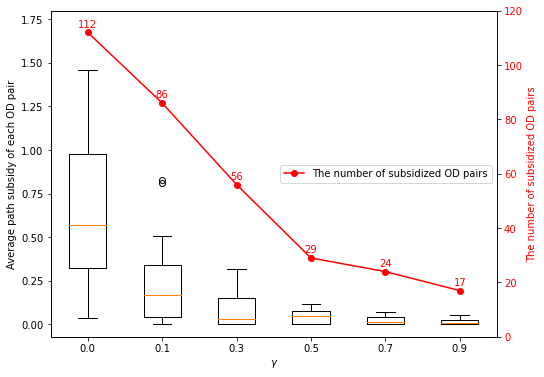

In [11]:
def calculate_average_OD_subsidies(subsidies, path_RH_flows):
    average_OD_subsidies = {}
    average_OD_RH_TT = {}
    for key in subsidies:
        flows = path_RH_flows[key]
        OD_subsidies = subsidies[key]
        assert len(flows) == len(OD_subsidies), "the number of path flows should equal to the number of subsidies"
        average_OD_subsidy = np.sum(np.multiply(np.array(flows), np.array(OD_subsidies)))/sum(flows)
        if average_OD_subsidy>0:
            average_OD_subsidies[key] = average_OD_subsidy

    return average_OD_subsidies
        

subsidies_boxplot = []
x = range(1, 7)
gamma_list = np.insert(np.arange(0.1, 1.1, 0.2), 0, 0.0)
for i in gamma_list:
    i = np.round(i, 1)
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        subsidies = record_dict['path_subsidies']
        path_RH_flows = record_dict['path_flows_ride_hailing']
        average_OD_subsidies = calculate_average_OD_subsidies(subsidies, path_RH_flows)
        subsidies_boxplot.append(list(average_OD_subsidies.values()))


fig, ax1 = plt.subplots(figsize=(8,6))

bp_dict = ax1.boxplot(subsidies_boxplot)
print(bp_dict['medians'])

ax1.set_xlabel("$\gamma$")
ax1.set_ylabel("Average path subsidy of each OD pair")
ax1.set_ylim(ymax=1.8)

OD_num = [len(subsidies_boxplot[x_i-1]) for x_i in x]

ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('The number of subsidized OD pairs', color=color)  # we already handled the x-label with ax1
ax2.plot(x, OD_num, color=color, marker='o', label='The number of subsidized OD pairs')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='center right')
ax2.set_ylim(ymin=0, ymax=120)
plt.xticks(x, [round(i, 1) for i in gamma_list])

for i in range(len(x)):
    # get position data for median line
    ax2.text(x[i], OD_num[i] + 2, OD_num[i], horizontalalignment='center', color='red')


fig_name = directory + "output/path subsidies.png"
plt.savefig(fig_name, dpi=800)
plt.show()

In [13]:
gamma_list = np.insert(np.arange(0.1, 1.1, 0.2), 0, 0.0)
for i in gamma_list:
    i = np.round(i, 1)
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        print(record_dict.keys())

dict_keys(['TTT_VS_iter', 'subsidy_cost_VS_iter', 'generalized_cost_VS_iter', 'FTT_VS_iter', 'link VC ratios', 'link subsidies (tolls)', 'path_flows_driving', 'path_flows_ride_hailing', 'path_subsidies'])
dict_keys(['TTT_VS_iter', 'subsidy_cost_VS_iter', 'generalized_cost_VS_iter', 'FTT_VS_iter', 'link VC ratios', 'link subsidies (tolls)', 'path_flows_driving', 'path_flows_ride_hailing', 'path_subsidies'])
dict_keys(['TTT_VS_iter', 'subsidy_cost_VS_iter', 'generalized_cost_VS_iter', 'FTT_VS_iter', 'link VC ratios', 'link subsidies (tolls)', 'path_flows_driving', 'path_flows_ride_hailing', 'path_subsidies'])
dict_keys(['TTT_VS_iter', 'subsidy_cost_VS_iter', 'generalized_cost_VS_iter', 'FTT_VS_iter', 'link VC ratios', 'link subsidies (tolls)', 'path_flows_driving', 'path_flows_ride_hailing', 'path_subsidies'])
dict_keys(['TTT_VS_iter', 'subsidy_cost_VS_iter', 'generalized_cost_VS_iter', 'FTT_VS_iter', 'link VC ratios', 'link subsidies (tolls)', 'path_flows_driving', 'path_flows_ride_hail

No handles with labels found to put in legend.


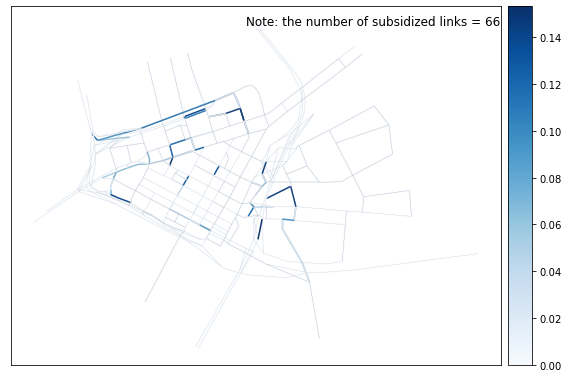

No handles with labels found to put in legend.


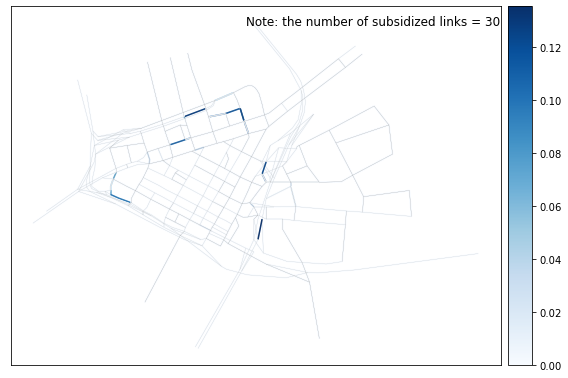

No handles with labels found to put in legend.


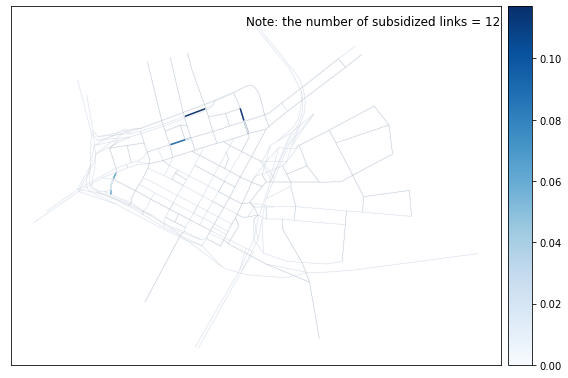

No handles with labels found to put in legend.


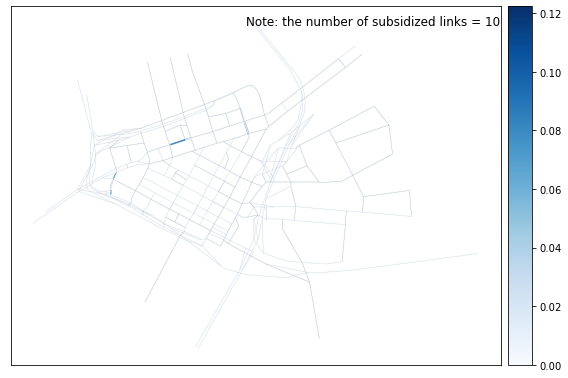

In [10]:
# ----plot subsidy distribution with different gammas
shp = gpd.read_file(shp_file)


for i in np.round(np.arange(0.1, 0.9, 0.2), 1):
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        TTT_list = record_dict['TTT_VS_iter']
        cost_omega_list = record_dict['subsidy_cost_VS_iter']
        obj_list = record_dict[ 'generalized_cost_VS_iter']
        vc_list = record_dict['link VC ratios']
        toll_list = record_dict['link subsidies (tolls)']
    value_dict = toll_list

    shp["link"] = shp[["N1","N2"]].apply(tuple, axis=1)
    shp['value'] = shp["link"].map(value_dict)

    fig, ax = plt.subplots(1, 1,  figsize=(8, 6))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    # shp.plot(alpha=1.0, edgecolor='red', ax=ax)

    shp_ax = shp.plot(column='value', cmap='Blues', ax=ax, legend=True, cax=cax)
    shp.plot(alpha=0.5, edgecolor='grey', ax=ax, linewidth=0.2)

    shp_ax.xaxis.set_visible(False)
    shp_ax.yaxis.set_visible(False)
    fig_name = directory + "output/ORHP subsidy distribution (gamma={}) of PGH.jpg".format(i)
    plt.tight_layout()
    num_subsidized = sum([1 if i > 0 else 0 for i in list(value_dict.values())])
    prop_subsidized = np.round(num_subsidized/len(list(value_dict.values())), 3)
    plt.legend(loc='upper right', title_fontsize='large', bbox_to_anchor=(0.08, 1.0), title='Note: the number of subsidized links = {}'.format(num_subsidized), frameon=False)
    plt.savefig(fig_name, dpi=800)
    plt.show()

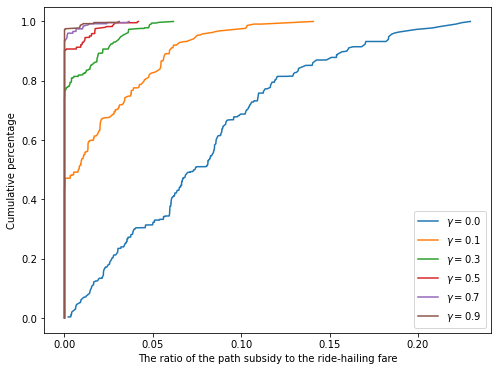

In [4]:
def calculate_path_subsidy_vs_TT(subsidies, path_TT, path_RH_flows):
    subsidy_vs_TT = []
    weight_flow = []

    for key in subsidies:
        flows = path_RH_flows[key]
        OD_subsidies = subsidies[key]
        TTs = path_TT[key]
        assert len(flows) == len(OD_subsidies) and len(OD_subsidies) == len(TTs), "the number of path flows, the number of subsidies"
        for flow, subsidy, TT in zip(flows, OD_subsidies, TTs):
            if flow > 0:
                subsidy_vs_TT.append(subsidy / TT)
                weight_flow.append(flow)

    return subsidy_vs_TT, weight_flow

plt.figure(figsize=(8, 6))
mu_p = 2
gamma_list = np.insert(np.arange(0.1, 1.1, 0.2), 0, 0.0)
for i in gamma_list:
    i = np.round(i, 1)
    with open(file_ORHP_gamma_x.format(i), 'rb') as f:
        record_dict = pickle.load(f)
        subsidies = record_dict['path_subsidies']
        path_RH_flows = record_dict['path_flows_ride_hailing']
        path_TT = record_dict['path_TT']
        data, weights = calculate_path_subsidy_vs_TT(subsidies, path_TT, path_RH_flows)


    data = np.array(data) / mu_p
    weights = np.array(weights)
    # sort the data and weights in ascending order of data
    sort_idx = np.argsort(data)
    data_sorted = data[sort_idx]
    weights_sorted = weights[sort_idx]

    # calculate the weighted CDF using numpy
    weighted_sum = np.cumsum(weights_sorted)
    weighted_cdf = weighted_sum / weighted_sum[-1]

    # plot the weighted CDF using matplotlib
    plt.plot(data_sorted, weighted_cdf, label=r'$\gamma={}$'.format(i))
plt.xlabel('The ratio of the path subsidy to the ride-hailing fare')
plt.ylabel('Cumulative percentage')
plt.legend()
# plt.title('Weighted CDF of Data')
fig_name = directory + "output/ratio of subsidy to the ride-hailing fare.png"
plt.savefig(fig_name, dpi=800)